# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
# Read and store the dataset
df = pd.read_csv('GermanCredit.csv')

en_y = LabelEncoder()
df['Class'] = en_y.fit_transform(df['Class'])

# Divide Predictors (X) and target (y)
X = df.drop('Class',axis=1)
y = df['Class'] 

# Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [3]:
# GridSearchCV parameter tuning for Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
params = {"max_depth":[2,3,4,5,10], "max_features":[2,3,4]}
gcv = GridSearchCV(clf,params,cv=5)
gcv.fit(X_train,y_train)
gcv.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=2, random_state=42)

In [4]:
# Creating Decision Tree Classifier with best values of the parameter 
clf1 = DecisionTreeClassifier(max_depth=4, max_features=2,random_state=42)
clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.13      0.21        91
           1       0.72      0.95      0.82       209

    accuracy                           0.70       300
   macro avg       0.63      0.54      0.51       300
weighted avg       0.66      0.70      0.63       300



In [5]:
# Creating Decision Tree Classifier without tuning the parameters 
clf2 = DecisionTreeClassifier(random_state=42)
clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.44      0.48      0.46        91
           1       0.76      0.73      0.75       209

    accuracy                           0.65       300
   macro avg       0.60      0.61      0.60       300
weighted avg       0.66      0.65      0.66       300



Parameter tuning with GridSearchCV increases the accuracy of the model

### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [6]:
! pip install dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [7]:
# Visualization of Decision Tree using dtreeviz
from dtreeviz.trees import *
viz1 = dtreeviz(clf1, X_train, y_train,target_name='Class',feature_names=X.columns, class_names=["Good", "Bad"])

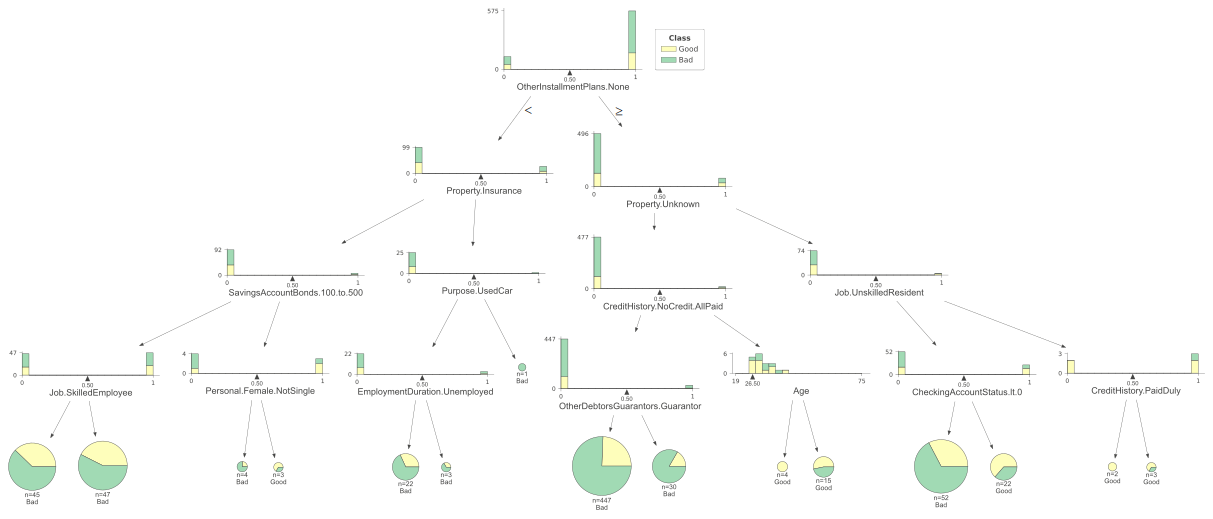

In [8]:
viz1

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [9]:
# Classification using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
# GridSearchCV parameter tuning for Random Forest Classifier
clf3 = RandomForestClassifier(random_state=42)
params = {"n_estimators":[100,150,200,250,300],"max_depth":[2,3,4,5,10]}
gcv1 = GridSearchCV(clf3,params,cv=5)
gcv1.fit(X_train,y_train)
gcv1.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=250, random_state=42)

In [11]:
# Creating Random Forest Classifier with best values of the parameter 
clf4 = RandomForestClassifier(max_depth=10, n_estimators=250, random_state=42)
clf4.fit(X_train,y_train)
y_pred4 = clf4.predict(X_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.77      0.33      0.46        91
           1       0.77      0.96      0.85       209

    accuracy                           0.77       300
   macro avg       0.77      0.64      0.66       300
weighted avg       0.77      0.77      0.73       300



As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

Feature ranking:
Amount is 0.0991
Duration is 0.0863
Age is 0.0765
CheckingAccountStatus.none is 0.0558
CheckingAccountStatus.lt.0 is 0.0403
InstallmentRatePercentage is 0.0328
CreditHistory.Critical is 0.0320
ResidenceDuration is 0.0292
Purpose.NewCar is 0.0226
SavingsAccountBonds.lt.100 is 0.0196
NumberExistingCredits is 0.0194
CheckingAccountStatus.0.to.200 is 0.0177
CreditHistory.NoCredit.AllPaid is 0.0175
Telephone is 0.0170
Housing.Own is 0.0157
Property.RealEstate is 0.0157
OtherInstallmentPlans.None is 0.0156
CreditHistory.PaidDuly is 0.0148
Property.Unknown is 0.0140
EmploymentDuration.lt.1 is 0.0140
Personal.Male.Single is 0.0139
Purpose.Radio.Television is 0.0139
Job.SkilledEmployee is 0.0132
Property.CarOther is 0.0131
Personal.Female.NotSingle is 0.0128
EmploymentDuration.1.to.4 is 0.0127
OtherInstallmentPlans.Bank is 0.0124
SavingsAccountBonds.Unknown is 0.0122
Job.Management.SelfEmp.HighlyQualified is 0.0118
CreditHistory.ThisBank.AllPaid is 0.0115
EmploymentDuration.Une

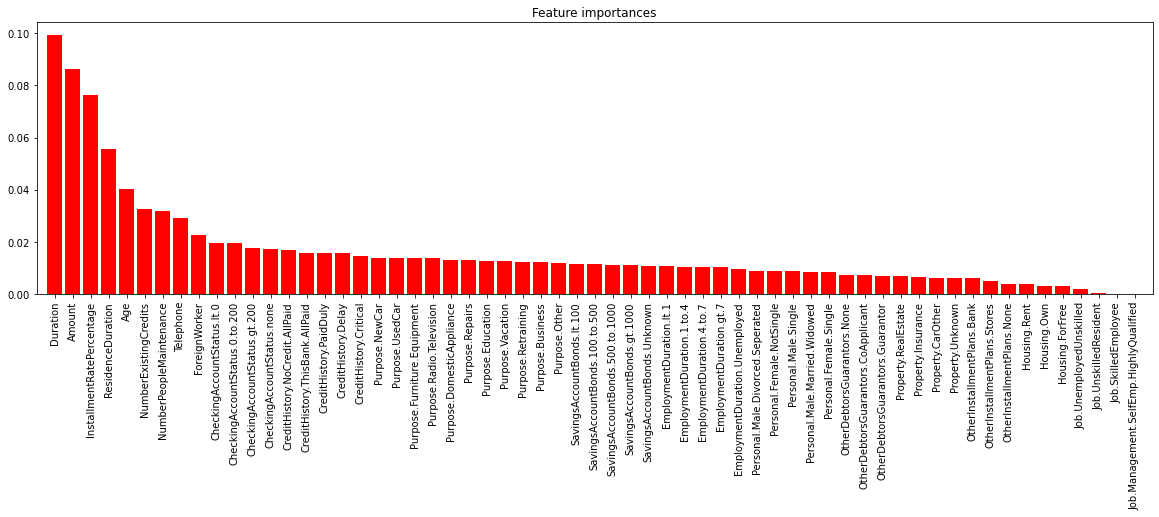

In [12]:
#Feature Importance
clf4.feature_importances_
importances = clf4.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%s is %.4f" % (X.columns[indices[f]], importances[indices[f]]))

# Feature importance plot
plt.figure(figsize=(20,5))
plt.title("Feature importances")
plt.bar(X.columns, importances[indices],color="r")
plt.xticks(X.columns,rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c1cccc4b80>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c1cb13d970>})

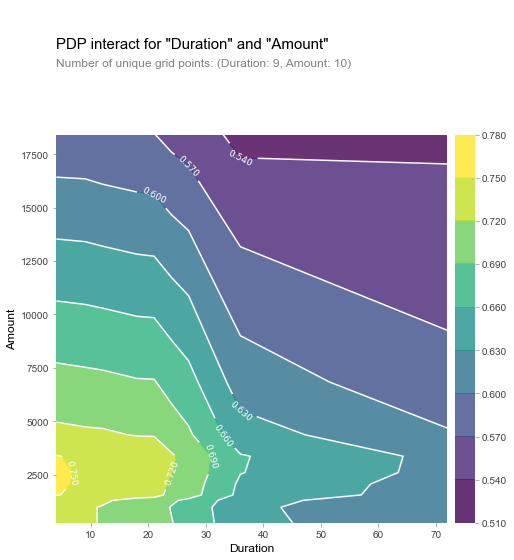

In [13]:
# Creating Partial Dependence Plots
# Used the features duration and amount to construct the Partial Dependence Plots
import pdpbox
from pdpbox import pdp
pdp_dur_amt = pdp.pdp_interact(clf4,X,X.columns,['Duration','Amount'])
pdp.pdp_interact_plot(pdp_dur_amt, ['Duration','Amount'])

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

! conda install -c anaconda py-xgboost

In [14]:
# Classification using XGBoost
from xgboost import XGBClassifier
xg_clf = XGBClassifier()
xg_clf.fit(X_train,y_train)
y_pred5 = xg_clf.predict(X_test)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.68      0.48      0.56        91
           1       0.80      0.90      0.85       209

    accuracy                           0.77       300
   macro avg       0.74      0.69      0.71       300
weighted avg       0.76      0.77      0.76       300



! conda install -c conda-forge catboost

In [15]:
# Classification using CatBoost
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier()
cat_clf.fit(X_train,y_train)
y_pred6 = cat_clf.predict(X_test)
print(classification_report(y_test,y_pred6))

Learning rate set to 0.008847
0:	learn: 0.6896892	total: 69.6ms	remaining: 1m 9s
1:	learn: 0.6859294	total: 71.7ms	remaining: 35.8s
2:	learn: 0.6822343	total: 73.5ms	remaining: 24.4s
3:	learn: 0.6790213	total: 75.4ms	remaining: 18.8s
4:	learn: 0.6745531	total: 77.3ms	remaining: 15.4s
5:	learn: 0.6716109	total: 79.1ms	remaining: 13.1s
6:	learn: 0.6684699	total: 81ms	remaining: 11.5s
7:	learn: 0.6652379	total: 82.9ms	remaining: 10.3s
8:	learn: 0.6618753	total: 84.8ms	remaining: 9.34s
9:	learn: 0.6598596	total: 86.8ms	remaining: 8.59s
10:	learn: 0.6570299	total: 89.1ms	remaining: 8.01s
11:	learn: 0.6543485	total: 91.2ms	remaining: 7.51s
12:	learn: 0.6515495	total: 93.5ms	remaining: 7.1s
13:	learn: 0.6489445	total: 95.9ms	remaining: 6.75s
14:	learn: 0.6455396	total: 98.2ms	remaining: 6.45s
15:	learn: 0.6429530	total: 101ms	remaining: 6.18s
16:	learn: 0.6402003	total: 103ms	remaining: 5.96s
17:	learn: 0.6379705	total: 105ms	remaining: 5.75s
18:	learn: 0.6353123	total: 108ms	remaining: 5.56s

202:	learn: 0.4267655	total: 501ms	remaining: 1.97s
203:	learn: 0.4261139	total: 503ms	remaining: 1.96s
204:	learn: 0.4256821	total: 505ms	remaining: 1.96s
205:	learn: 0.4249272	total: 507ms	remaining: 1.96s
206:	learn: 0.4245029	total: 510ms	remaining: 1.95s
207:	learn: 0.4240589	total: 512ms	remaining: 1.95s
208:	learn: 0.4235027	total: 514ms	remaining: 1.95s
209:	learn: 0.4228153	total: 517ms	remaining: 1.94s
210:	learn: 0.4221623	total: 519ms	remaining: 1.94s
211:	learn: 0.4215681	total: 522ms	remaining: 1.94s
212:	learn: 0.4210871	total: 524ms	remaining: 1.93s
213:	learn: 0.4204920	total: 526ms	remaining: 1.93s
214:	learn: 0.4198851	total: 528ms	remaining: 1.93s
215:	learn: 0.4191870	total: 530ms	remaining: 1.92s
216:	learn: 0.4187635	total: 532ms	remaining: 1.92s
217:	learn: 0.4181895	total: 534ms	remaining: 1.92s
218:	learn: 0.4176962	total: 536ms	remaining: 1.91s
219:	learn: 0.4172060	total: 538ms	remaining: 1.91s
220:	learn: 0.4165393	total: 540ms	remaining: 1.9s
221:	learn: 0

372:	learn: 0.3488232	total: 845ms	remaining: 1.42s
373:	learn: 0.3481962	total: 848ms	remaining: 1.42s
374:	learn: 0.3478918	total: 850ms	remaining: 1.42s
375:	learn: 0.3474497	total: 852ms	remaining: 1.41s
376:	learn: 0.3471541	total: 854ms	remaining: 1.41s
377:	learn: 0.3466533	total: 856ms	remaining: 1.41s
378:	learn: 0.3462767	total: 862ms	remaining: 1.41s
379:	learn: 0.3460031	total: 864ms	remaining: 1.41s
380:	learn: 0.3458207	total: 867ms	remaining: 1.41s
381:	learn: 0.3453153	total: 869ms	remaining: 1.41s
382:	learn: 0.3449257	total: 871ms	remaining: 1.4s
383:	learn: 0.3444787	total: 873ms	remaining: 1.4s
384:	learn: 0.3441694	total: 875ms	remaining: 1.4s
385:	learn: 0.3438443	total: 877ms	remaining: 1.4s
386:	learn: 0.3433184	total: 879ms	remaining: 1.39s
387:	learn: 0.3429105	total: 883ms	remaining: 1.39s
388:	learn: 0.3425846	total: 885ms	remaining: 1.39s
389:	learn: 0.3422284	total: 887ms	remaining: 1.39s
390:	learn: 0.3418396	total: 888ms	remaining: 1.38s
391:	learn: 0.34

553:	learn: 0.2924165	total: 1.19s	remaining: 957ms
554:	learn: 0.2921024	total: 1.19s	remaining: 955ms
555:	learn: 0.2917006	total: 1.19s	remaining: 952ms
556:	learn: 0.2914675	total: 1.19s	remaining: 950ms
557:	learn: 0.2911287	total: 1.2s	remaining: 948ms
558:	learn: 0.2906938	total: 1.2s	remaining: 945ms
559:	learn: 0.2903096	total: 1.2s	remaining: 943ms
560:	learn: 0.2898469	total: 1.2s	remaining: 941ms
561:	learn: 0.2894251	total: 1.2s	remaining: 939ms
562:	learn: 0.2892302	total: 1.21s	remaining: 936ms
563:	learn: 0.2888773	total: 1.21s	remaining: 934ms
564:	learn: 0.2887015	total: 1.21s	remaining: 932ms
565:	learn: 0.2884516	total: 1.21s	remaining: 929ms
566:	learn: 0.2881536	total: 1.21s	remaining: 927ms
567:	learn: 0.2878862	total: 1.22s	remaining: 924ms
568:	learn: 0.2875286	total: 1.22s	remaining: 922ms
569:	learn: 0.2872438	total: 1.22s	remaining: 919ms
570:	learn: 0.2871093	total: 1.22s	remaining: 917ms
571:	learn: 0.2867614	total: 1.22s	remaining: 915ms
572:	learn: 0.286

734:	learn: 0.2472516	total: 1.53s	remaining: 552ms
735:	learn: 0.2469701	total: 1.53s	remaining: 550ms
736:	learn: 0.2468744	total: 1.54s	remaining: 548ms
737:	learn: 0.2465389	total: 1.54s	remaining: 546ms
738:	learn: 0.2463801	total: 1.54s	remaining: 544ms
739:	learn: 0.2460902	total: 1.54s	remaining: 542ms
740:	learn: 0.2459128	total: 1.54s	remaining: 540ms
741:	learn: 0.2456611	total: 1.54s	remaining: 538ms
742:	learn: 0.2454224	total: 1.55s	remaining: 535ms
743:	learn: 0.2452380	total: 1.55s	remaining: 533ms
744:	learn: 0.2449994	total: 1.55s	remaining: 531ms
745:	learn: 0.2447897	total: 1.55s	remaining: 529ms
746:	learn: 0.2445570	total: 1.56s	remaining: 527ms
747:	learn: 0.2443832	total: 1.56s	remaining: 525ms
748:	learn: 0.2441183	total: 1.56s	remaining: 523ms
749:	learn: 0.2439700	total: 1.56s	remaining: 521ms
750:	learn: 0.2437793	total: 1.56s	remaining: 519ms
751:	learn: 0.2434654	total: 1.56s	remaining: 516ms
752:	learn: 0.2432107	total: 1.57s	remaining: 514ms
753:	learn: 

916:	learn: 0.2073974	total: 1.88s	remaining: 170ms
917:	learn: 0.2071860	total: 1.88s	remaining: 168ms
918:	learn: 0.2070167	total: 1.88s	remaining: 166ms
919:	learn: 0.2068368	total: 1.88s	remaining: 164ms
920:	learn: 0.2067196	total: 1.88s	remaining: 162ms
921:	learn: 0.2065622	total: 1.89s	remaining: 160ms
922:	learn: 0.2063007	total: 1.89s	remaining: 158ms
923:	learn: 0.2060750	total: 1.89s	remaining: 156ms
924:	learn: 0.2059327	total: 1.89s	remaining: 153ms
925:	learn: 0.2057294	total: 1.89s	remaining: 151ms
926:	learn: 0.2054988	total: 1.9s	remaining: 149ms
927:	learn: 0.2053355	total: 1.9s	remaining: 147ms
928:	learn: 0.2051778	total: 1.9s	remaining: 145ms
929:	learn: 0.2050401	total: 1.9s	remaining: 143ms
930:	learn: 0.2048873	total: 1.9s	remaining: 141ms
931:	learn: 0.2046007	total: 1.9s	remaining: 139ms
932:	learn: 0.2044675	total: 1.91s	remaining: 137ms
933:	learn: 0.2043022	total: 1.91s	remaining: 135ms
934:	learn: 0.2041378	total: 1.91s	remaining: 133ms
935:	learn: 0.2038

! conda install -c conda-forge lightgbm

In [16]:
# Classification using lightbgm
import lightgbm as lgb
lgm_clf = lgb.LGBMClassifier()
lgm_clf.fit(X_train, y_train)
y_pred7 = lgm_clf.predict(X_test)
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.72      0.54      0.62        91
           1       0.82      0.91      0.86       209

    accuracy                           0.80       300
   macro avg       0.77      0.72      0.74       300
weighted avg       0.79      0.80      0.79       300



Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [17]:
# Calculation of accuracy for different classification models
from sklearn.metrics import accuracy_score
acc_DT = accuracy_score(y_pred2, y_test)
acc_DT_tuned = accuracy_score(y_pred, y_test)
acc_RF = accuracy_score(y_pred4, y_test)
acc_XGB = accuracy_score(y_pred5, y_test)
acc_CatB = accuracy_score(y_pred6, y_test)
acc_LXGB = accuracy_score(y_pred7, y_test)

In [18]:
# Creating Pandas Dataframe for Comparison of different classification models
acc_dict= {'Classifier':['Decision Tree','Decision Tree Tuned','Random Forest','XGBoost','CatBoost','LightGBM'],
           'Accuracy':[acc_DT,acc_DT_tuned,acc_RF,acc_XGB,acc_CatB,acc_LXGB]}
acc_df = pd.DataFrame(acc_dict)
print(acc_df.head(6))

            Classifier  Accuracy
0        Decision Tree  0.653333
1  Decision Tree Tuned  0.703333
2        Random Forest  0.766667
3              XGBoost  0.773333
4             CatBoost  0.790000
5             LightGBM  0.796667


Text(0.5, 1.0, 'Comparison of different classification models')

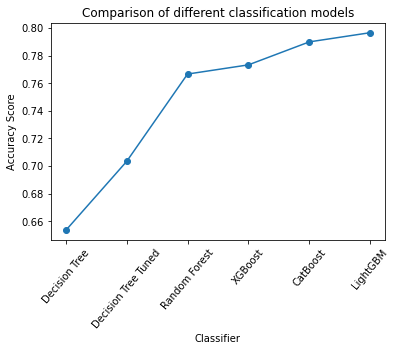

In [19]:
# Visual Comparison of different classification models
import matplotlib.pyplot as plt
plt.scatter(acc_df.Classifier,acc_df.Accuracy)
plt.plot(acc_df.Classifier,acc_df.Accuracy)
plt.xticks(rotation=50)
plt.xlabel("Classifier")
plt.ylabel("Accuracy Score")
plt.title("Comparison of different classification models")